**Project Background:**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies. Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

**Data from Kaggle.com**

# **Import Data**

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload

# **Main Dataset**
**Data Application (Train)**

In [10]:
df_train = pd.read_csv("/content/train.csv")
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)
df_train.head(10)

This dataset has 2000 rows dan 21 columns.



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


There are total 2,000 rows which contains the information of loans and there are 21 features.

The TARGET feature determines whether the smartphone falls into a high-priced category. A value of 3 indicates that the phone is in the very high price range, signifying a premium or expensive device. A value of 2 denotes that the phone is in the high price range. A value of 1 indicates that the phone is in the medium price range. Conversely, a value of 0 indicates that the phone is not in the high price range, indicating a more affordable or budget-friendly device.

# **Exploratory Data Analysis (EDA)**


**Check Data Types**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Visualization**

In [74]:
train = df_train.copy()

In [75]:
train['ID'] = range(1, 2001)
train.insert(0, 'ID', train.pop('ID'))

**Univariate: Analysis of Smartphone Price Ranges**

In [77]:
decode_map = {0: "Low", 1: "Medium", 2: "High", 3: "Very High"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['price_range'] = train['price_range'].apply(lambda x: decode_sentiment(x))

In [78]:
target_grp = (train[['price_range']]
                .groupby("price_range")
                .agg(COUNT=("price_range","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='viridis')

,price_range,COUNT
0,High,500
1,Low,500
2,Medium,500
3,Very High,500


In [79]:
grp = train['price_range'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='viridis')

,index,price_range
0,Medium,0.250000
1,High,0.250000
2,Very High,0.250000
3,Low,0.250000


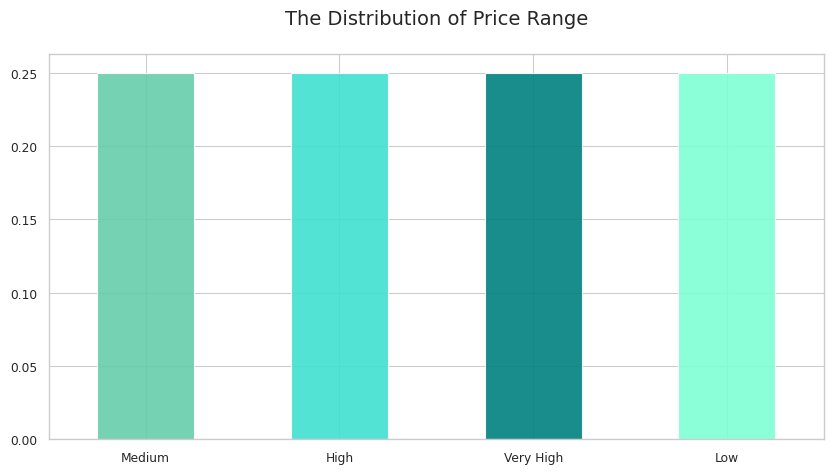

In [80]:
fig = plt.figure(figsize = (10,5))
grp.plot(kind='bar', color= ['mediumaquamarine', 'turquoise', 'Teal', 'Aquamarine'], alpha = 0.9, rot=0)
plt.title('The Distribution of Price Range\n', fontsize=14)
plt.show()

**Bivariate: Categorical Features Vs Price Range**

Bluetooth, Dual Slim, 4G, 3G, touchscree, and wifi

<Axes: title={'center': 'Price Range By WiFi\n'}, xlabel='wifi', ylabel='count'>

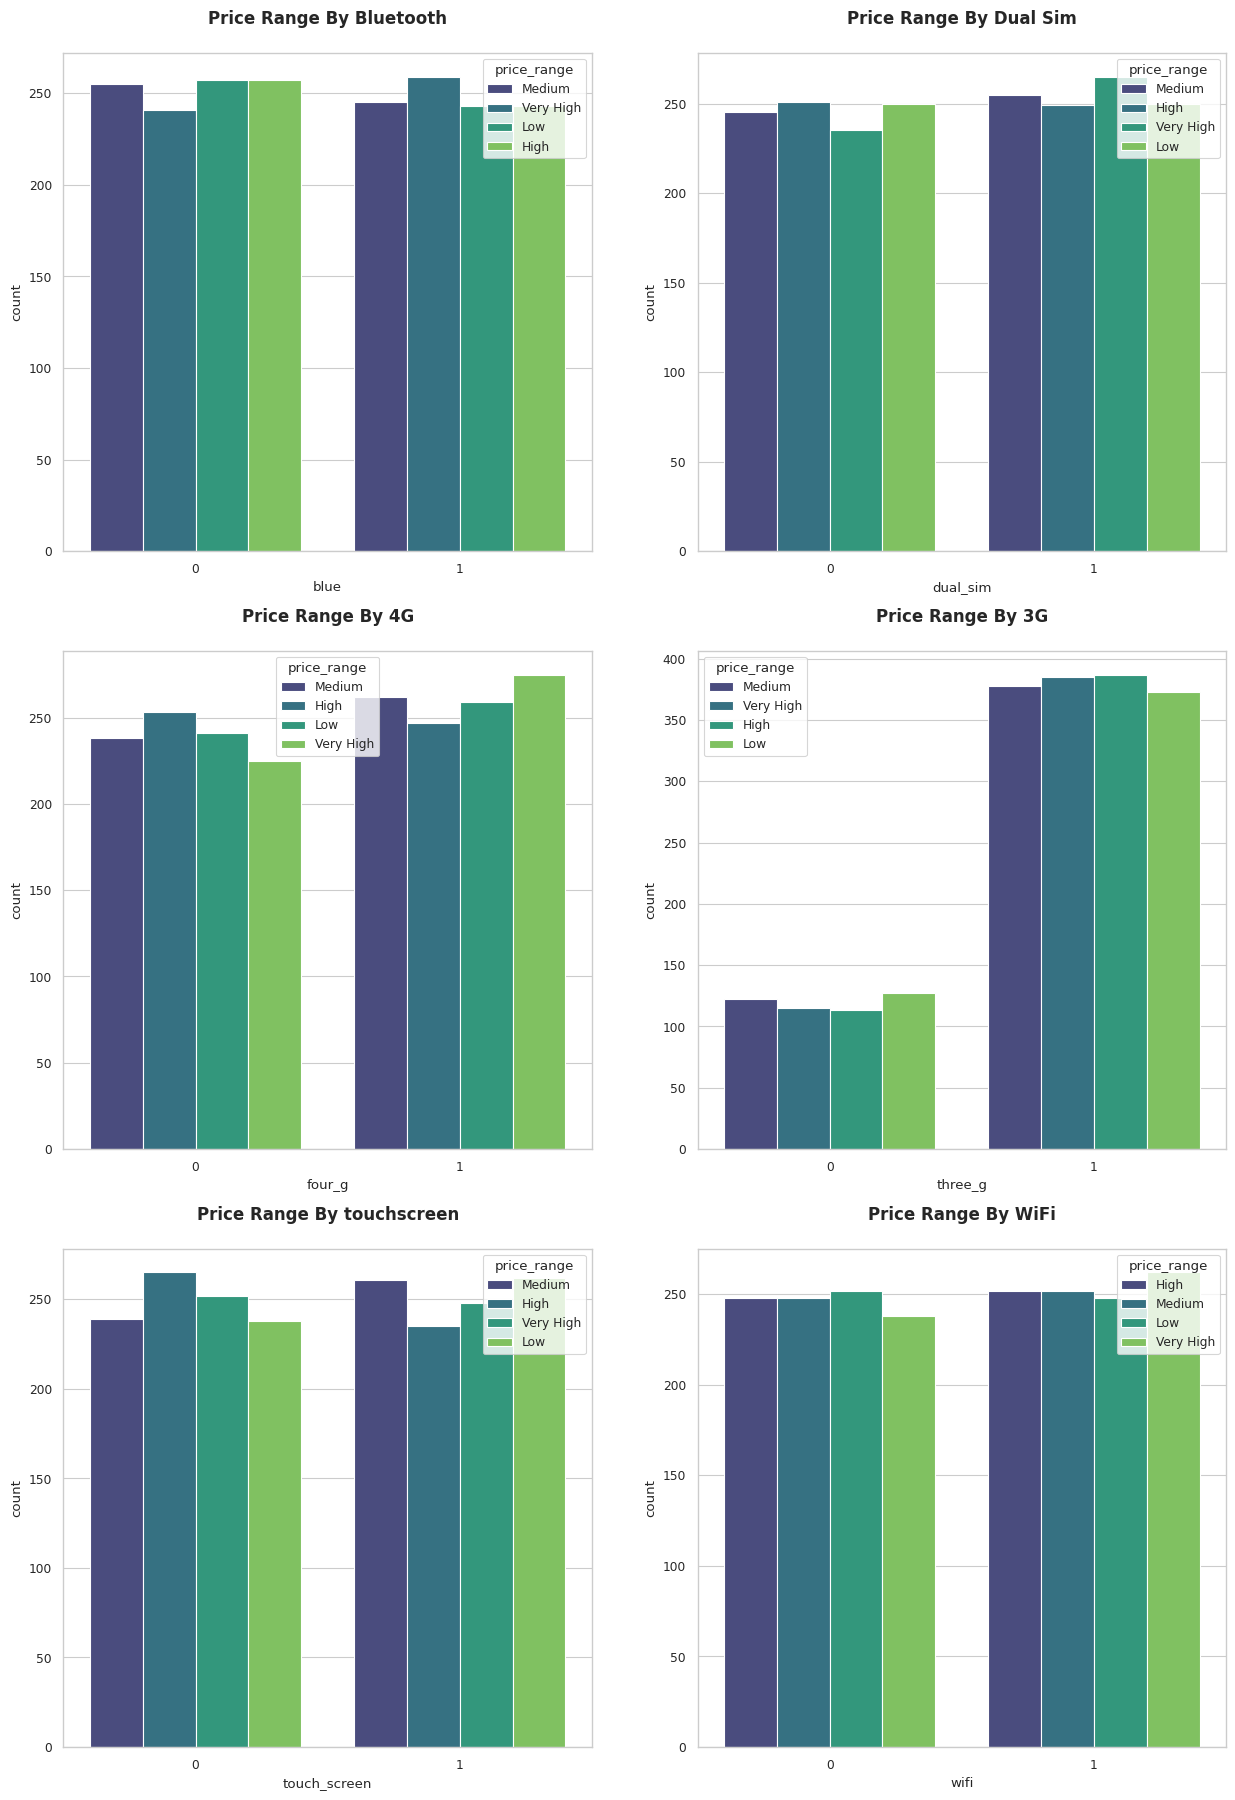

In [81]:
# visualization pt 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,2, figsize=(15,22))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Price Range By Bluetooth\n', fontweight='bold', fontsize=12)
sns.countplot(x='blue', data = train, hue = 'price_range', palette = 'viridis', ax=ax[0][0])

ax[0][1].set_title('Price Range By Dual Sim\n', fontweight='bold', fontsize=12)
sns.countplot(x='dual_sim', data = train, hue = 'price_range', palette = 'viridis', ax=ax[0][1])

ax[1][0].set_title('\nPrice Range By 4G\n', fontweight='bold', fontsize=12)
sns.countplot(x='four_g', data = train, hue = 'price_range', palette = 'viridis', ax=ax[1][0])

ax[1][1].set_title('\nPrice Range By 3G\n', fontweight='bold', fontsize=12)
sns.countplot(x='three_g', data = train, hue = 'price_range', palette = 'viridis', ax=ax[1][1])

ax[2][0].set_title('Price Range By touchscreen\n', fontweight='bold', fontsize=12)
sns.countplot(x='touch_screen', data = train, hue = 'price_range', palette = 'viridis', ax=ax[2][0])

ax[2][1].set_title('Price Range By WiFi\n', fontweight='bold', fontsize=12)
sns.countplot(x='wifi', data = train, hue = 'price_range', palette = 'viridis', ax=ax[2][1])

**Bluetooth Vs Price Range**

In [96]:
ct = train.groupby(by=['blue', 'price_range'], as_index=False)['ID'].count()
print('Price Range By Bluetooth')
ct.sort_values(by='ID', ascending=False)
ct.style.background_gradient(cmap='Pastel1')

Price Range By Bluetooth


,blue,price_range,ID
0,0,High,257
1,0,Low,257
2,0,Medium,255
3,0,Very High,241
4,1,High,243
5,1,Low,243
6,1,Medium,245
7,1,Very High,259


It can be seen that the distribution of price ranges varies between devices without Bluetooth feature and those with Bluetooth feature. Devices without bluetooh have the highest count in the 'High' Price range and with Bluetooth have the highest count in the 'Very High' price range. Indicating a potential difference in pricing strategies or product categories based on the Bluetooth feature.

**Dual Sim Vs Price Range**

In [99]:
ct = train.groupby(by=['dual_sim', 'price_range'], as_index=False)['ID'].count()
print('Price Range By Dual Sim')
ct.sort_values(by='ID', ascending=False)
ct.style.background_gradient(cmap='Pastel1')

Price Range By Dual Sim


,dual_sim,price_range,ID
0,0,High,251
1,0,Low,250
2,0,Medium,245
3,0,Very High,235
4,1,High,249
5,1,Low,250
6,1,Medium,255
7,1,Very High,265


It can be seen that the distribution of price ranges varies between devices with dual sim feature and those without dual sim feature. Devices without dual sim have the highest count in the 'High' Price range and with dual sim have the highest count in the 'Very High' price range. Indicating a potential difference in pricing strategies or product categories based on the dual sim feature.

**4G Vs Price Range**

In [100]:
ct = train.groupby(by=['four_g', 'price_range'], as_index=False)['ID'].count()
print('Price Range By 4G')
ct.sort_values(by='ID', ascending=False)
ct.style.background_gradient(cmap='Pastel1')

Price Range By 4G


,four_g,price_range,ID
0,0,High,253
1,0,Low,241
2,0,Medium,238
3,0,Very High,225
4,1,High,247
5,1,Low,259
6,1,Medium,262
7,1,Very High,275


It can be seen that the distribution of price ranges varies between devices with 4G. Devices without 4G have the highest count in the 'High' Price range and with 4G have the highest count in the 'Very High' price range. Indicating a potential difference in pricing strategies or product categories based on the 4G feature.

**3G Vs Price Range**

In [101]:
ct = train.groupby(by=['three_g', 'price_range'], as_index=False)['ID'].count()
print('Price Range By 3G')
ct.sort_values(by='ID', ascending=False)
ct.style.background_gradient(cmap='Pastel1')

Price Range By 3G


,three_g,price_range,ID
0,0,High,113
1,0,Low,127
2,0,Medium,122
3,0,Very High,115
4,1,High,387
5,1,Low,373
6,1,Medium,378
7,1,Very High,385


It can be seen that the distribution of price ranges varies between devices with 3G. Devices without 3G have the highest count in the 'Low' Price range and with 3G have the highest count in the 'High' price range. Indicating a potential difference in pricing strategies or product categories based on the 3G feature.
And Price range 4G highest than 3G

**Touchscreen Vs Price Range**

In [102]:
ct = train.groupby(by=['touch_screen', 'price_range'], as_index=False)['ID'].count()
print('Price Range By Touchscreen')
ct.sort_values(by='ID', ascending=False)
ct.style.background_gradient(cmap='Pastel1')

Price Range By Touchscreen


,touch_screen,price_range,ID
0,0,High,265
1,0,Low,238
2,0,Medium,239
3,0,Very High,252
4,1,High,235
5,1,Low,262
6,1,Medium,261
7,1,Very High,248


It can be seen that the distribution of price ranges varies between devices with touchscreen. Devices without touchscreen have the highest count in the 'High' Price range and with touchscreen have the highest count in the 'low' price range. Indicating a potential difference in pricing strategies or product categories based on the touchscreen feature.

**WiFi Vs Price Range**

In [103]:
ct = train.groupby(by=['wifi', 'price_range'], as_index=False)['ID'].count()
print('Price Range By WiFi')
ct.sort_values(by='ID', ascending=False)
ct.style.background_gradient(cmap='Pastel1')

Price Range By WiFi


,wifi,price_range,ID
0,0,High,248
1,0,Low,252
2,0,Medium,248
3,0,Very High,238
4,1,High,252
5,1,Low,248
6,1,Medium,252
7,1,Very High,262


It can be seen that the distribution of price ranges varies between devices with WiFi. Devices without WiFi have the highest count in the 'Low' Price range and with WiFi have the highest count in the 'High' and 'Medium' price range. Indicating a potential difference in pricing strategies or product categories based on the touchscreen feature.

**Bivariate: Numerical Features Vs Price Range**

**Battery Power, Clock Speed, Front Camera, Internal Memory, Mobile Depth, Weight, Core of Processor, Primary Camera Mega Pixel, Pixel Resolution Height**

<Axes: title={'center': 'Price Range By Pixel Resolution Height\n'}, xlabel='price_range', ylabel='px_height'>

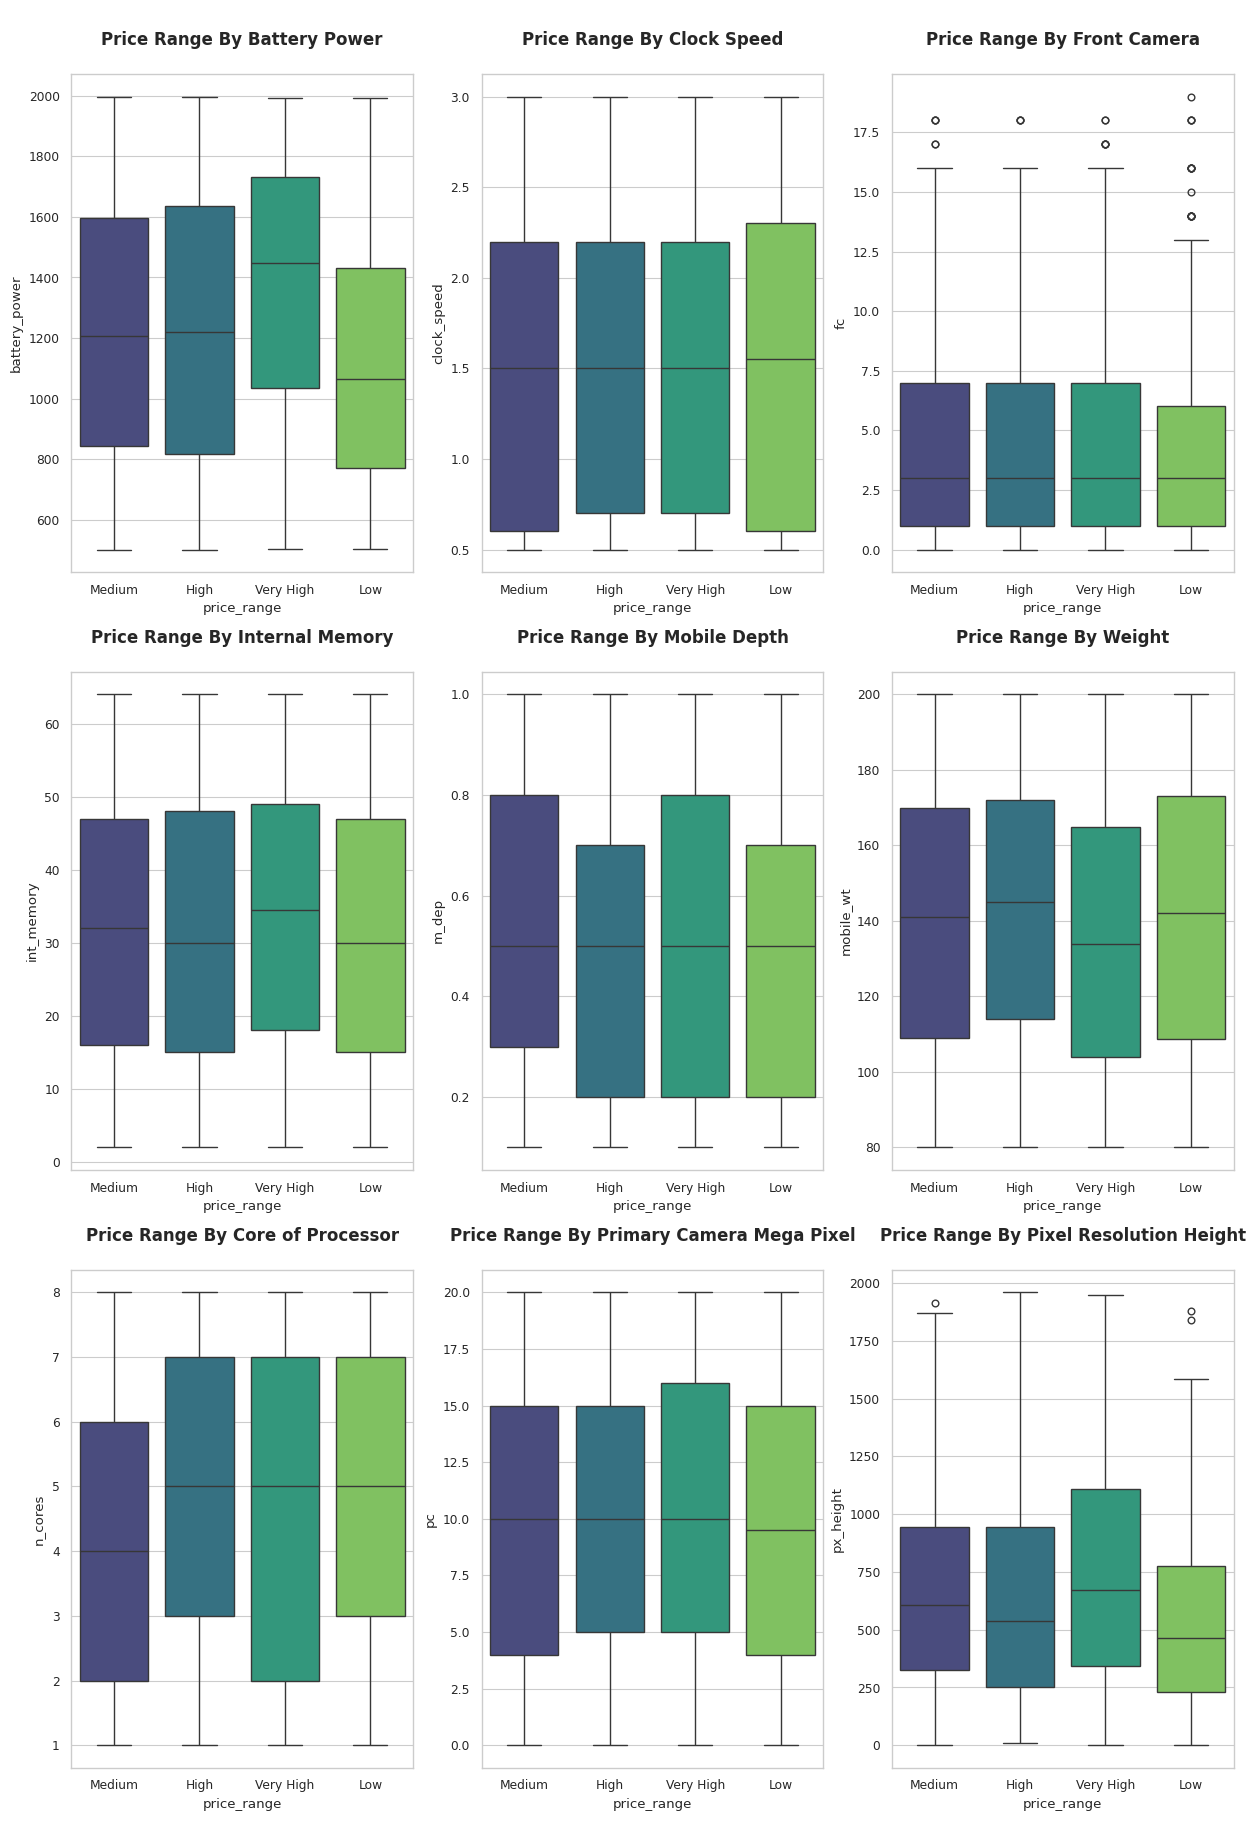

In [110]:
# visualization pt 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 3, figsize=(15, 22))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Price Range By Battery Power\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='battery_power', data=train, palette='viridis', ax=ax[0][0])

ax[0][1].set_title('Price Range By Clock Speed\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='clock_speed', data=train, palette='viridis', ax=ax[0][1])

ax[0][2].set_title('\nPrice Range By Front Camera\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='fc', data=train, palette='viridis', ax=ax[0][2])

ax[1][0].set_title('\nPrice Range By Internal Memory\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='int_memory', data=train, palette='viridis', ax=ax[1][0])

ax[1][1].set_title('Price Range By Mobile Depth\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='m_dep', data=train, palette='viridis', ax=ax[1][1])

ax[1][2].set_title('Price Range By Weight\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='mobile_wt', data=train, palette='viridis', ax=ax[1][2])

ax[2][0].set_title('Price Range By Core of Processor\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='n_cores', data=train, palette='viridis', ax=ax[2][0])

ax[2][1].set_title('Price Range By Primary Camera Mega Pixel\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='pc', data=train, palette='viridis', ax=ax[2][1])

ax[2][2].set_title('Price Range By Pixel Resolution Height\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='px_height', data=train, palette='viridis', ax=ax[2][2])

It can be seen that products range have a very high value compared to products in the low categories.

<Axes: title={'center': '\nPrice Range By Screen Width\n'}, xlabel='price_range', ylabel='sc_w'>

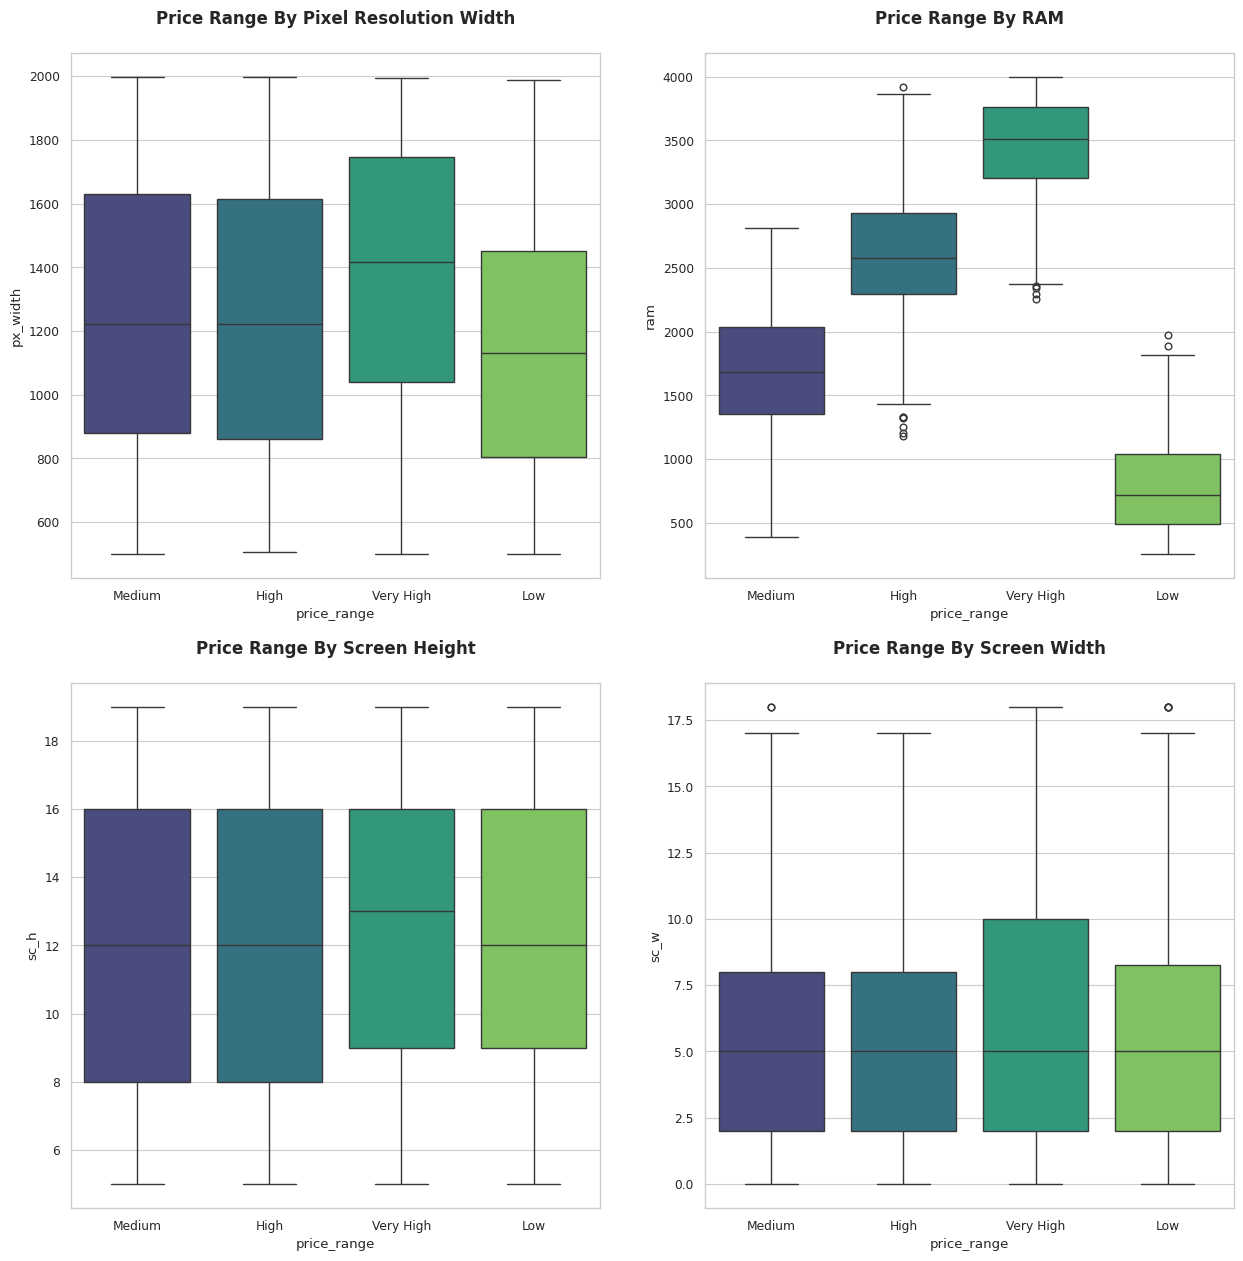

In [116]:
# visualization pt 3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Price Range By Pixel Resolution Width\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='px_width', data=train, palette='viridis', ax=ax[0][0])

ax[0][1].set_title('Price Range By RAM\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='ram', data=train, palette='viridis', ax=ax[0][1])

ax[1][0].set_title('\nPrice Range By Screen Height\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='sc_h', data=train, palette='viridis', ax=ax[1][0])

ax[1][1].set_title('\nPrice Range By Screen Width\n', fontweight='bold', fontsize=12)
sns.boxplot(x='price_range', y='sc_w', data=train, palette='viridis', ax=ax[1][1])

It can be seen that the very high value of the very high price range for Screen Height, Screen Width, Ram, and pixel resolution width is higher than the low categories. This indicates that products range have a very high value compared to products in the low categories.

**Talk Time Vs Price Range**

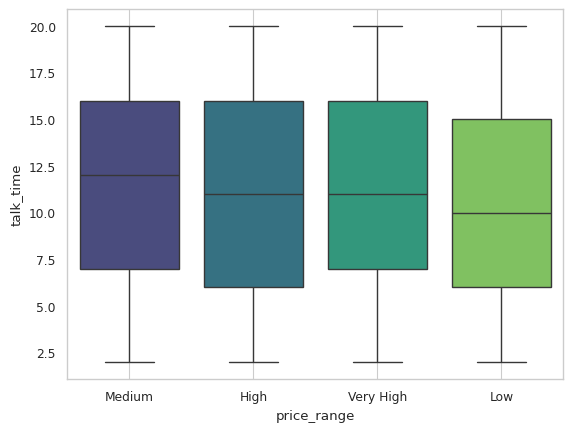

In [206]:
# visualization pt 4
sns.boxplot(x='price_range', y='talk_time', data=train, palette = 'viridis')
plt.grid()
plt.show()

It can be seen that the median value of the medium price range for talk time is higher than the median values for the very high and low categories. This indicates that products with a medium talk time range have a higher median value compared to products in the very high and low categories. Therefore, products with a medium talk time range tend to have a medium price range compared to products in the very high and low categories in this context.

# **Data Cleaning**

**Detecting Data Duplication**

In [118]:
print('The number of duplication is:', df_train.duplicated().sum())

The number of duplication is: 0


**Detecting Missing Values**

In [119]:
print('Missing values status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,battery_power,0,0.0
1,px_height,0,0.0
2,wifi,0,0.0
3,touch_screen,0,0.0
4,three_g,0,0.0
5,talk_time,0,0.0
6,sc_w,0,0.0
7,sc_h,0,0.0
8,ram,0,0.0
9,px_width,0,0.0


**Feature Selection**

**Drop Unnecessary Feature**

In [121]:
train.drop(['ID'], inplace=True, axis=1)

In [122]:
x = df_train.drop(['price_range'], axis=1)
y = df_train['price_range']

In [123]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


It can be seen which features correlate well with price range.

Best features: ram, px_height, battery_power, px_width, mobile_wt

Worst features: three_g, wifi, dual_sim, clock_speed, blue

**Data Splitting**

In [135]:
# define x and y features (top 10 features)
x_balanced = df_train[['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt','int_memory',
                       'sc_w', 'talk_time', 'fc', 'sc_h']]
y_balanced = df_train['price_range']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1600, 10) (400, 10)


In [137]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **Model Building**
Here are some algorithms that will be tested to determine the best model:

1. Logistic Regression
2. Random Forest
3. Decision Tree
4. K-Nearest Neighbor
5. Neural Network
6. Gaussian Naive Bayes

**1. Logistic Regression**

In [138]:
log_model = LogisticRegression().fit(X_train, y_train)

In [141]:
y_train_pred_log = log_model.predict(X_train)
categories = ['Low', 'Medium', 'High', 'Very High']

confusion_matrix_log = pd.DataFrame(confusion_matrix(y_train, y_train_pred_log),
                                     index=pd.Index(categories, name='Actual'),
                                     columns=pd.Index(categories, name='Predicted'))

In [143]:
y_test_pred_log = log_model.predict(X_test)
categories = ['Low', 'Medium', 'High', 'Very High']

confusion_matrix_log = pd.DataFrame(confusion_matrix(y_test, y_test_pred_log),
                                    index=pd.Index(categories, name='Actual'),
                                    columns=pd.Index(categories, name='Predicted'))

In [159]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 97.94
Test Accuracy: % 96.75


**2. Random Forest**

In [161]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [163]:
y_train_pred_rf = rf_model.predict(X_train)


In [164]:
confusion_matrix_rf = pd.DataFrame(confusion_matrix(y_train, y_train_pred_rf),
                                   index=pd.Index(categories, name='Actual'),
                                   columns=pd.Index(categories, name='Predicted'))

In [165]:
y_test_pred_rf = rf_model.predict(X_test)

In [166]:
categories = ['Low', 'Medium', 'High', 'Very High']

confusion_matrix_rf = pd.DataFrame(confusion_matrix(y_test, y_test_pred_rf),
                                    index=pd.Index(categories, name='Actual'),
                                    columns=pd.Index(categories, name='Predicted'))

In [167]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 89.75


**3. Decision Tree**

In [170]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

In [171]:
y_train_pred_dt = dt_model.predict(X_train)

In [172]:
confusion_matrix_dt = pd.DataFrame(confusion_matrix(y_train, y_train_pred_dt),
                                   index=pd.Index(categories, name='Actual'),
                                   columns=pd.Index(categories, name='Predicted'))

In [173]:
y_test_pred_dt = dt_model.predict(X_test)

In [174]:
categories = ['Low', 'Medium', 'High', 'Very High']

confusion_matrix_dt = pd.DataFrame(confusion_matrix(y_test, y_test_pred_dt),
                                   index=pd.Index(categories, name='Actual'),
                                   columns=pd.Index(categories, name='Predicted'))

In [175]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 85.5


**4. K-Nearest Neighbors**

In [176]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [177]:
y_train_pred_knn = knn_model.predict(X_train)

In [179]:
confusion_matrix_knn = pd.DataFrame(confusion_matrix(y_train, y_train_pred_knn),
                                    index=pd.Index(categories, name='Actual'),
                                    columns=pd.Index(categories, name='Predicted'))

In [180]:
y_test_pred_knn = knn_model.predict(X_test)

In [181]:
confusion_matrix_knn = pd.DataFrame(confusion_matrix(y_test, y_test_pred_knn),
                                     index=pd.Index(categories, name='Actual'),
                                     columns=pd.Index(categories, name='Predicted'))

In [182]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 80.56
Test Accuracy: % 68.75


**5. Neural Network**

In [183]:
nn_model = MLPClassifier().fit(X_train, y_train)

In [184]:
y_train_pred_nn = nn_model.predict(X_train)

In [186]:
confusion_matrix_nn = pd.DataFrame(confusion_matrix(y_train, y_train_pred_nn),
                                   index=pd.Index(categories, name='Actual'),
                                   columns=pd.Index(categories, name='Predicted'))

In [187]:
y_test_pred_nn = nn_model.predict(X_test)

In [190]:
confusion_matrix_nn = pd.DataFrame(confusion_matrix(y_test, y_test_pred_nn),
                                   index=pd.Index(categories, name='Actual'),
                                   columns=pd.Index(categories, name='Predicted'))

In [191]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

Training Accuracy: % 99.25
Test Accuracy: % 95.0


**6. Gaussian Naive Bayes**

In [192]:
gnb_model = GaussianNB().fit(X_train, y_train)

In [193]:
y_train_pred_gnb = gnb_model.predict(X_train)

In [194]:
y_test_pred_gnb = gnb_model.predict(X_test)

In [195]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 80.62
Test Accuracy: % 79.5


# **Model Selection**

In [198]:
results = pd.DataFrame([["Logistic Regression", 0.9794, 0.9675],
                        ["Random Forest", 1, 0.8975],
                        ["Decision Tree", 1, 0.855],
                        ["K-Nearest Neighbor", 0.8056, 0.6875],
                        ["Neural Network", 0.9925, 0.95],
                        ["naive bayes", 0.8062, 0.795]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Pastel1')

,Models,Training Accuracy Score,Testing Accuracy Score
1,Random Forest,1.000000,0.897500
2,Decision Tree,1.000000,0.855000
4,Neural Network,0.992500,0.950000
0,Logistic Regression,0.979400,0.967500
5,naive bayes,0.806200,0.795000
3,K-Nearest Neighbor,0.805600,0.687500


**The prediction accuracy of the train and test data in Random Forest model has a value that is not much different, it can be said that the model is very good, which is there is no underfitting or overfitting. So the Random Forest model was chosen as the best model to predict a price range indicating how high the price is**

# **Prediction**


# **Import Dataset**

In [199]:
df_test = pd.read_csv('/content/test.csv')
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 1000 rows dan 21 columns.



,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# **Data Prepocessing**

**Detecting Duplication**

In [200]:
print('The number of duplication is:', df_test.duplicated().sum())

The number of duplication is: 0


**Detecting Missing Values**

In [201]:
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,id,0,0.0
1,pc,0,0.0
2,touch_screen,0,0.0
3,three_g,0,0.0
4,talk_time,0,0.0
5,sc_w,0,0.0
6,sc_h,0,0.0
7,ram,0,0.0
8,px_width,0,0.0
9,px_height,0,0.0


**Prediction**

Prediction
Predict price range on application data test with best machine learning model obtained before, i.e Random Forest.

In [202]:
pred_test = df_test[['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt','int_memory',
                     'sc_w', 'talk_time', 'fc', 'sc_h']]
pred_test.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,3476,226,1043,1412,193,5,7,2,14,12
1,3895,746,841,857,191,61,0,7,4,6
2,2396,1270,1807,1366,186,27,10,10,1,17
3,3893,295,1546,1752,96,25,0,7,18,10
4,1773,749,1434,810,108,49,8,7,11,15


In [205]:
# lets predict!
predict = pd.Series(rf_model.predict(pred_test), name = "price_range").astype(int)
results = pd.concat([df_test['id'], predict],axis = 1)
results.to_csv("predict mobile price classification.csv", index = False)
results.head()

,id,price_range
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3


**Conclusion:**

Smartphones with comprehensive features tend to fall within the very high price range.

**Recommendation:**
*   Consider adjusting prices based on features identified as key determinants of the price range.
*   Evaluate the most popular price ranges and popular brands.







